In [1]:
import sys
sys.setrecursionlimit(10000)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.transforms import offset_copy
from fastcluster import linkage

from colaml.__main__ import phytbl_from_json
from colaml.misc import dataplot

from myconfig import DATASET_DIR
from mydata import filter_table
from plotutil import *

In [3]:
def modlinkage(X, Z=None, **linkagekw):
    """
    reorder dendrogram according to copy numbers
    """
    N = len(X)
    if Z is None:
        Z = linkage(X, **linkagekw)
    assert (Z[:, 0:2] < np.arange(N, 2*N-1)[:,None]).all()
    
    size  = np.hstack([np.ones(N), Z[:,3]])
    meanZ = np.hstack([X.mean(axis=1), np.empty(N-1)])
    
    for i, zi in enumerate(Z):
        idxLR = zi[0:2].astype(int)
        zi[0:2] = zi[meanZ[idxLR].argsort()[::-1]]
        meanZ[i + N] = meanZ[idxLR] @ size[idxLR] / zi[3]
        
    return Z

## the fish dataset

In [4]:
fish_data_path = DATASET_DIR/'03-fish'/'fish-main-v0.json.gz'
fish_phytbl, fish_columns = filter_table(*phytbl_from_json(fish_data_path, 3))

In [5]:
precomp = dataplot.draw_extant(fish_phytbl, lmax=3, metric='braycurtis')
plt.close(precomp.fig)

fish_linkage = modlinkage(precomp.data.T, precomp.dendrogram_col.linkage.copy())

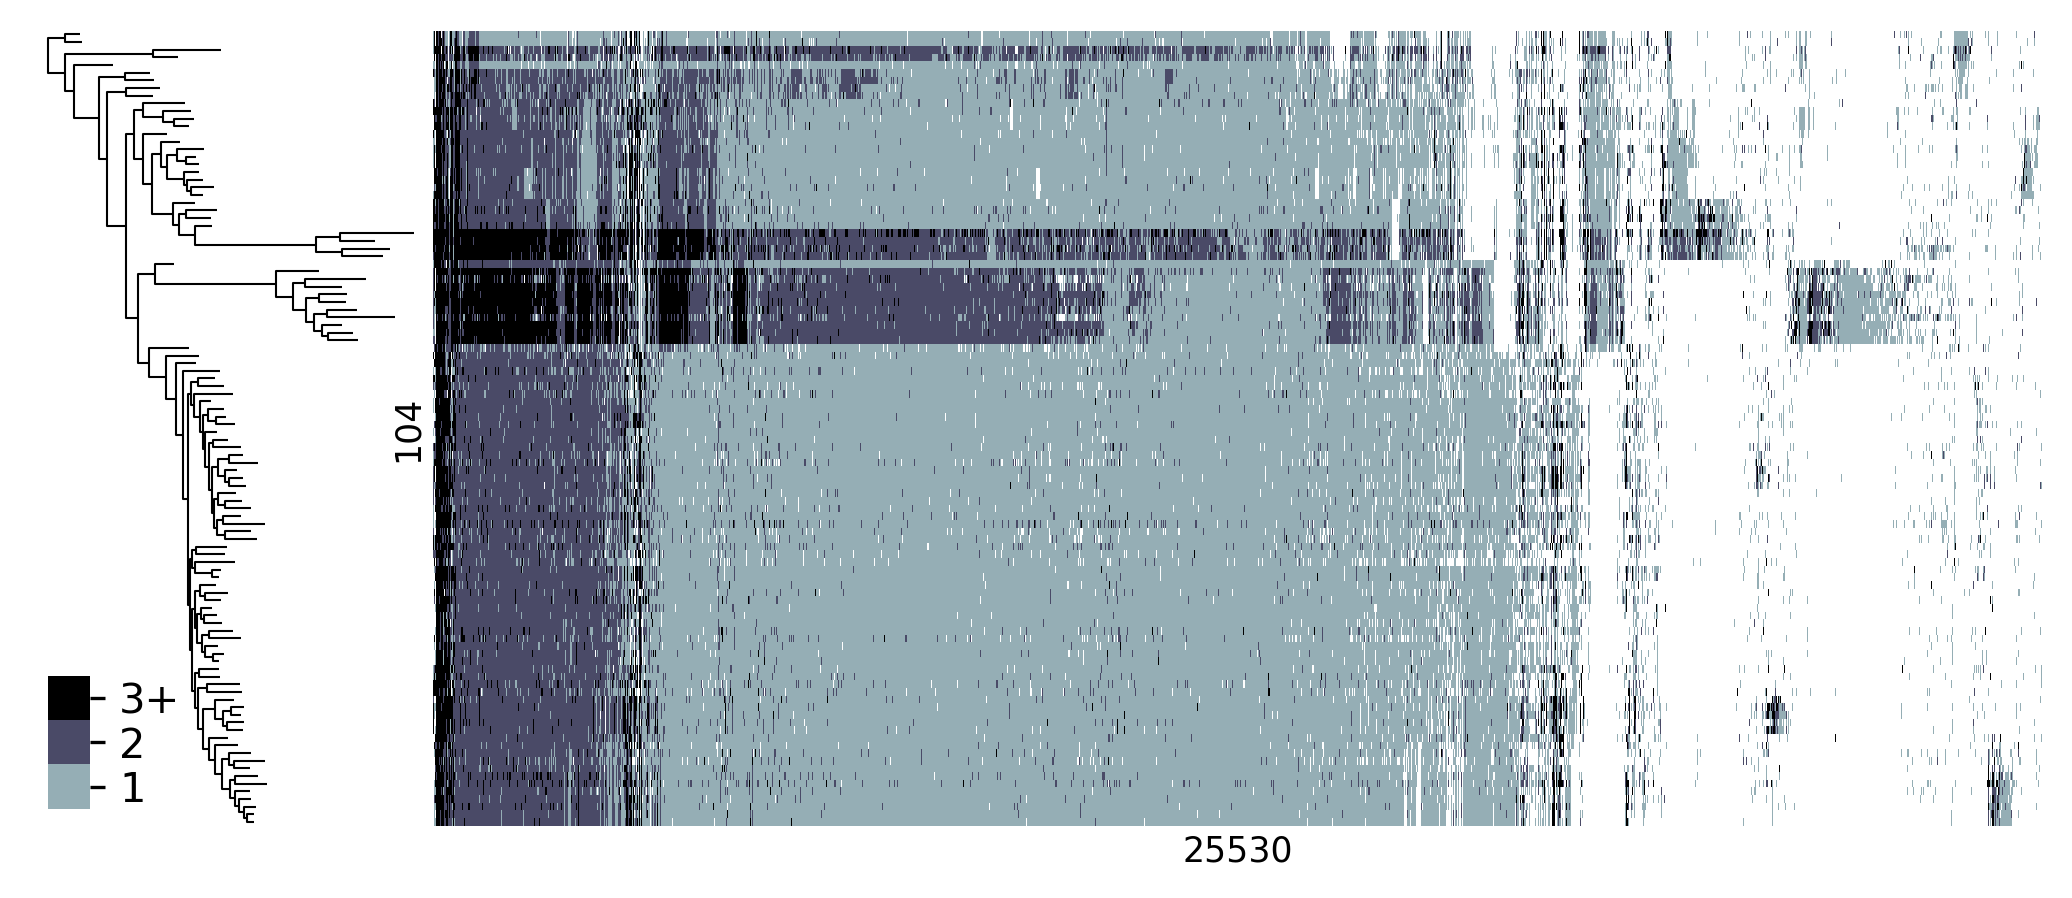

In [6]:
clst = dataplot.draw_extant(
    fish_phytbl, lmax=3, col_linkage=fish_linkage, figsize=(178*mm, 75*mm), 
    phylotreekw=dict(nodelw=0.5), tree_kws=dict(visible=False), dendrogram_ratio=(0.2, 0), 
    cbar_pos=(0.03, 0.07, 0.02, 0.15)
)
clst.ax_heatmap.invert_yaxis()
clst.cax.set_yticklabels(['1', '2', '3+'])
clst.ax_heatmap.set_xlabel(clst.data.shape[1], fontsize='small', labelpad=2)
clst.ax_heatmap.set_ylabel(clst.data.shape[0], fontsize='small', labelpad=2)
clst.ax_heatmap.yaxis.set_label_position('left')
clst.fig.set_dpi(300)

clst.fig.savefig('jpg/suppl-prof-fish.jpg', bbox_inches='tight', dpi=150)
clst.fig.savefig('png/suppl-prof-fish.png', bbox_inches='tight', dpi=150)
clst.fig.savefig('pdf/suppl-prof-fish.pdf', bbox_inches='tight')

## the bacteria dataset

In [7]:
bact_data_path = DATASET_DIR/'02-bacteria'/'bacteria-main-v0.json.gz'
bact_phytbl, bact_columns = filter_table(*phytbl_from_json(bact_data_path, 3))

In [8]:
precomp = dataplot.draw_extant(bact_phytbl, lmax=3, metric='braycurtis')
plt.close(precomp.fig)

bact_linkage = modlinkage(precomp.data.T, precomp.dendrogram_col.linkage.copy())

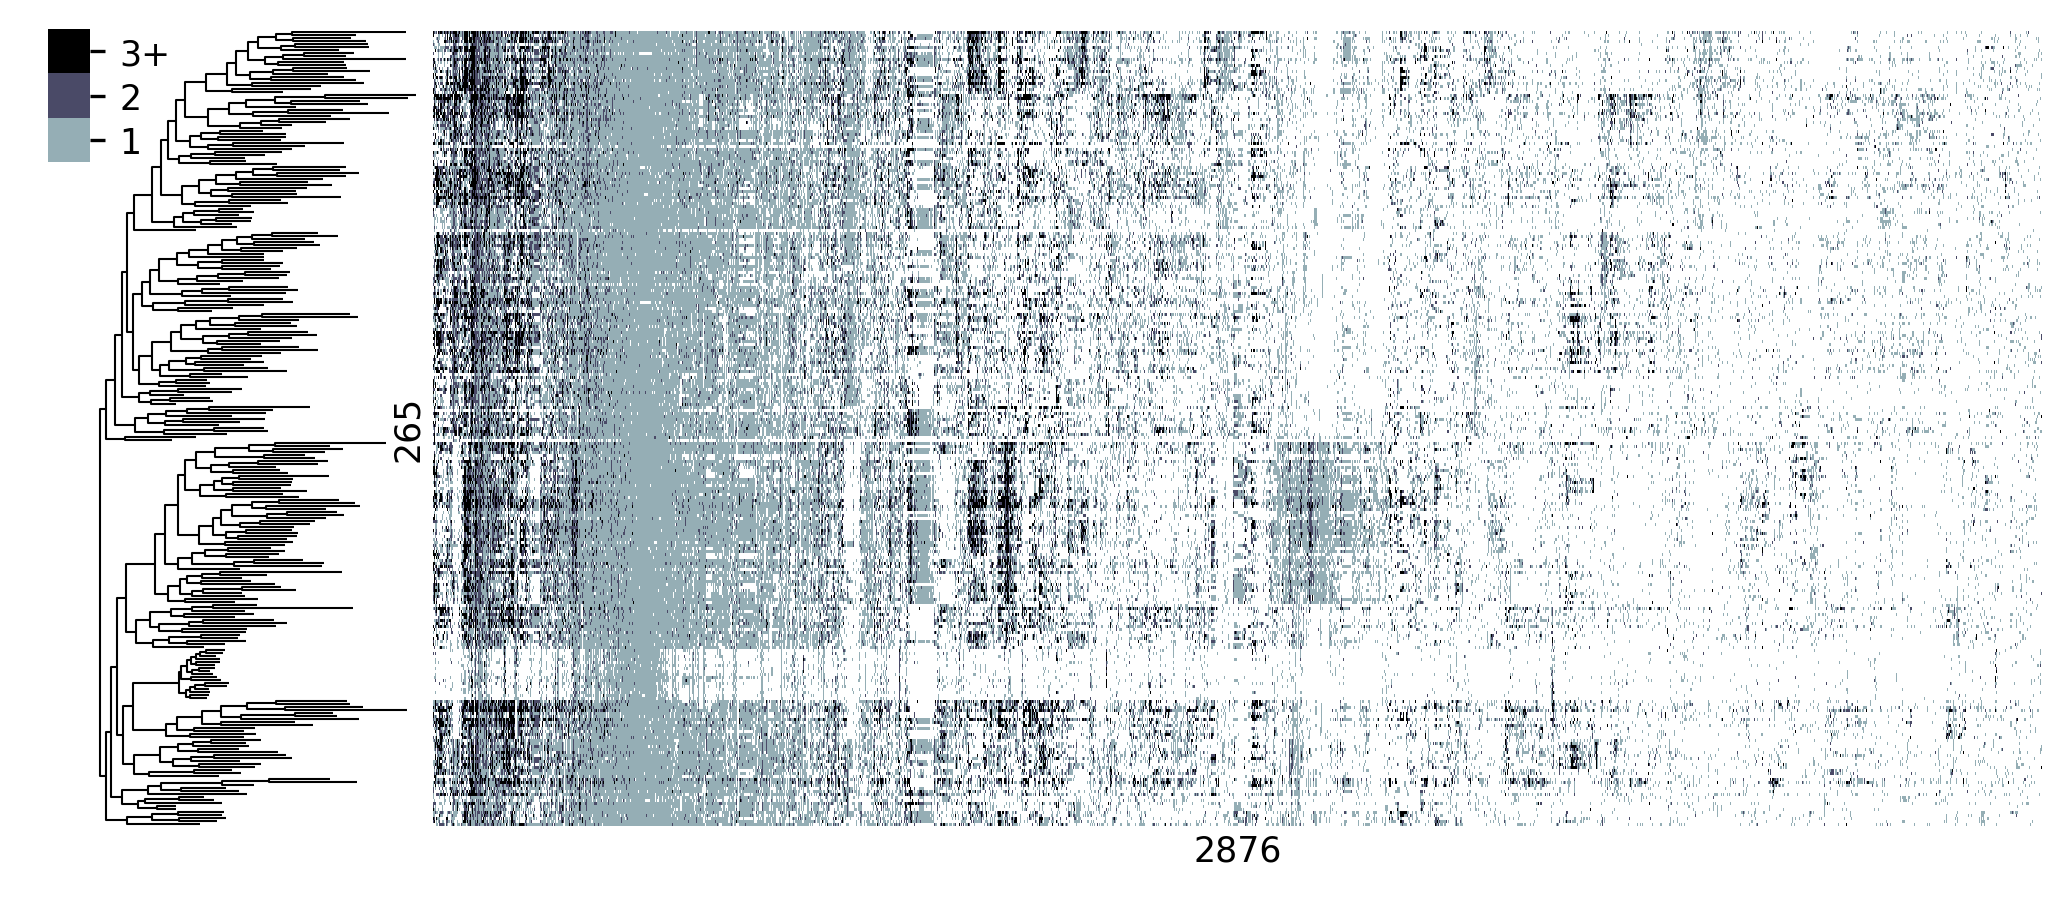

In [9]:
clst = dataplot.draw_extant(
    bact_phytbl, lmax=3, col_linkage=bact_linkage, figsize=(178*mm, 75*mm), 
    phylotreekw=dict(nodelw=0.5), tree_kws=dict(visible=False), dendrogram_ratio=(0.2, 0), 
    cbar_pos=(0.03, 0.80, 0.02, 0.15)
)
clst.cax.set_yticklabels(['1', '2', '3+'], fontsize='small')
clst.ax_heatmap.set_xlabel(clst.data.shape[1], fontsize='small', labelpad=2)
clst.ax_heatmap.set_ylabel(clst.data.shape[0], fontsize='small', labelpad=2)
clst.ax_heatmap.yaxis.set_label_position('left')
clst.ax_row_dendrogram.set_xbound(lower=-0.2)
clst.fig.set_dpi(300)

clst.fig.savefig('jpg/suppl-prof-bact.jpg', bbox_inches='tight', dpi=150)
clst.fig.savefig('png/suppl-prof-bact.png', bbox_inches='tight', dpi=150)
clst.fig.savefig('pdf/suppl-prof-bact.pdf', bbox_inches='tight')